# 1. Conhecendo os Dados

**O conjunto de dados é composto pelas seguintes variáveis:**

* data — data da medição do consumo

* temperatura — temperatura média do dia

* dia_da_semana — dia da semana (0 = segunda-feira, 6 = domingo)

* fim_de_semana — indicador de final de semana (0 = não, 1 = sim)

* feriado — indica se o dia é feriado (0 = não, 1 = sim)

* area_m2 — área do imóvel em metros quadrados

* numero_moradores — quantidade de pessoas na residência

* consumo_kwh — consumo de energia elétrica em kWh (variável alvo)

In [1]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/Dataset - Ciencia de dados/dataset_consumo_energia.csv')
dados.head()

,data,dia_da_semana,fim_de_semana,feriado,temperatura,area_m2,numero_moradores,consumo_kwh
0,2021-01-01,sexta,nao,nao,27.9,160,3,35.59
1,2021-01-02,sabado,sim,nao,18.4,60,4,27.61
2,2021-01-03,domingo,sim,nao,30.6,200,4,46.54
3,2021-01-04,segunda,nao,nao,11.2,60,1,16.33
4,2021-01-05,terca,nao,sim,22.3,80,5,39.05


# Análises Preliminares

* Verificando o info() - para ver se existem dados nulos eos tipos dos dados

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              1500 non-null   object 
 1   dia_da_semana     1500 non-null   object 
 2   fim_de_semana     1500 non-null   object 
 3   feriado           1500 non-null   object 
 4   temperatura       1500 non-null   float64
 5   area_m2           1500 non-null   int64  
 6   numero_moradores  1500 non-null   int64  
 7   consumo_kwh       1500 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


* Pegando a descrição dos dados numéricos

In [3]:
dados.describe().round(2)

,temperatura,area_m2,numero_moradores,consumo_kwh
count,1500.00,1500.00,1500.00,1500.00
mean,25.01,120.24,2.94,32.04
std,4.55,47.18,1.41,6.20
min,10.90,60.00,1.00,11.57
25%,21.98,80.00,2.00,27.89
50%,25.10,100.00,3.00,32.08
75%,28.10,160.00,4.00,36.24
max,41.80,200.00,5.00,52.25


* Verificando se existem dados nulos

In [4]:
dados.isna().sum()

,0
data,0
dia_da_semana,0
fim_de_semana,0
feriado,0
temperatura,0
area_m2,0
numero_moradores,0
consumo_kwh,0


* Verificando os dados duplicados

In [5]:
dados.duplicated().sum()

np.int64(0)

# Ajustando os Dados para ver sua Correlação

* Retirando da base de dados a parte dos 'Datas'

In [6]:
dados.drop(columns='data', axis=1, inplace=True)

In [7]:
dados['dia_da_semana'].unique()

array(['sexta', 'sabado', 'domingo', 'segunda', 'terca', 'quarta',
       'quinta'], dtype=object)

* Trocando os dias da semana por números, para melhor entendimento do modelo

In [8]:
dias = {
    'segunda': 0,
    'terca': 1,
    'quarta': 2,
    'quinta': 3,
    'sexta': 4,
    'sabado': 5,
    'domingo': 6
}
dados['dia_da_semana'] = dados['dia_da_semana'].map(dias)

* trocando sim e não por 0 e 1 - nas colunas **fim_de_semana** e **feriado**

In [9]:
sim_ou_nao = {
    'nao': 0,
    'sim': 1
}
dados['fim_de_semana'] = dados['fim_de_semana'].map(sim_ou_nao)
dados['feriado'] = dados['feriado'].map(sim_ou_nao)

Para entender a relação dos dados entre o valor de venda dos imóveis do dataset e suas características vamos utilizar a Correlação.

Correlação é uma medida estatística que varia numa escala de -1 a 1, indicando a relação e a dependência entre duas variáveis. Existem três
tipos principais de correlação:
1. **Correlação Positiva:** quando uma variável aumenta, a outra tende a aumentar.
2. **Correlação Nula:** não há relação linear entre as variáveis.
3. **Correlação Negativa:** quando uma variável aumenta, a outra tende a diminuir.

Essa medida não só define a direção, como também, a intensidade da relação.

In [10]:
dados.corr().round(2)

,dia_da_semana,fim_de_semana,feriado,temperatura,area_m2,numero_moradores,consumo_kwh
dia_da_semana,1.00,0.79,-0.01,0.02,-0.04,-0.01,0.22
fim_de_semana,0.79,1.00,-0.03,0.04,-0.02,-0.01,0.29
feriado,-0.01,-0.03,1.00,-0.00,0.03,0.00,0.21
temperatura,0.02,0.04,-0.00,1.00,-0.01,-0.01,0.50
area_m2,-0.04,-0.02,0.03,-0.01,1.00,-0.02,0.42
numero_moradores,-0.01,-0.01,0.00,-0.01,-0.02,1.00,0.44
consumo_kwh,0.22,0.29,0.21,0.50,0.42,0.44,1.00


* **OBS:** Vamos ficar de olho na coluna 'Dia_da_semana' com o 'Fim_de_semana' pois estão com uma correlação muito forte, quase 0.8

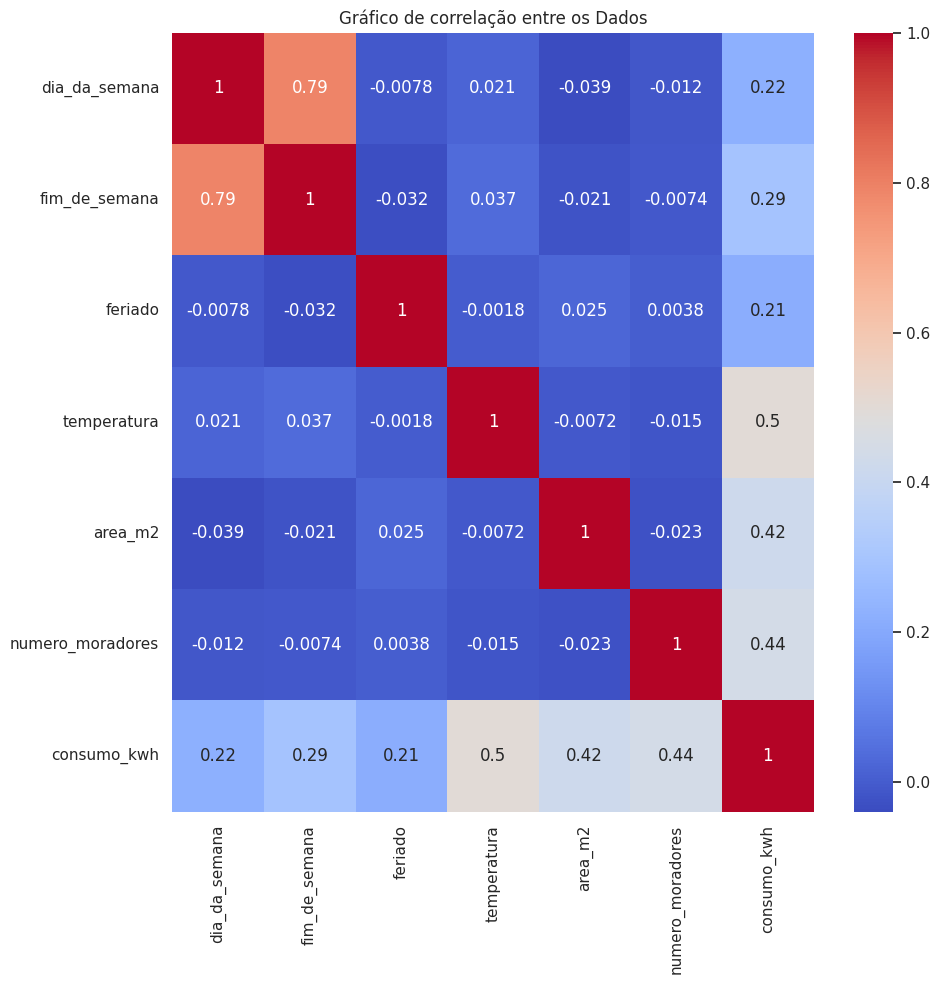

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Accent')
sns.set_theme(style="darkgrid")

ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(dados.corr(), annot=True, cmap='coolwarm')
plt.title('Gráfico de correlação entre os Dados')
plt.tight_layout()
plt.show()

# 2. Análises Gráficas

# Comportamento da variável dependente (Y)

* Verificando com o **BOXPLOT** se os valores do **CONSUMO** apresentam dados com Outliers

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

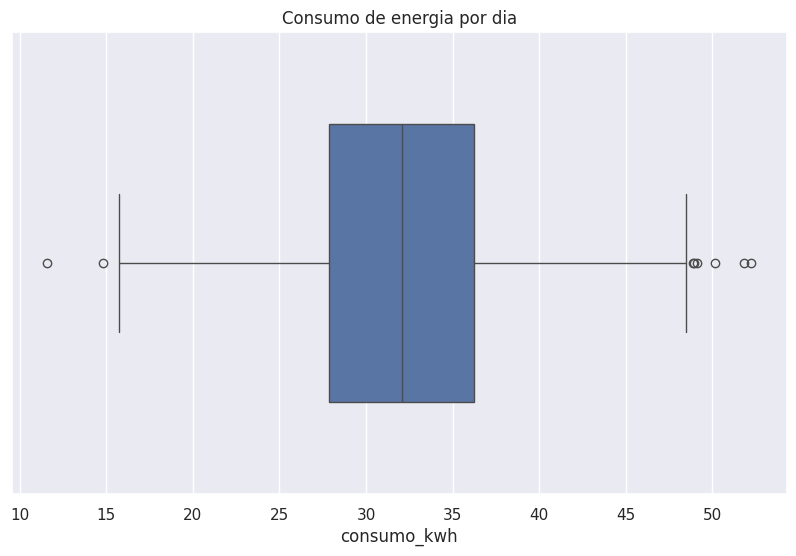

In [13]:
ax = sns.boxplot(data=dados, x='consumo_kwh', width=0.6)
ax.figure.set_size_inches(10,6)
plt.title('Consumo de energia por dia')
plt.show()

* Verificando agora a **DISTRIBUIÇÃO** dos dados, para analisar se precisa ser feita alguma transformação logaritmica por exemplo

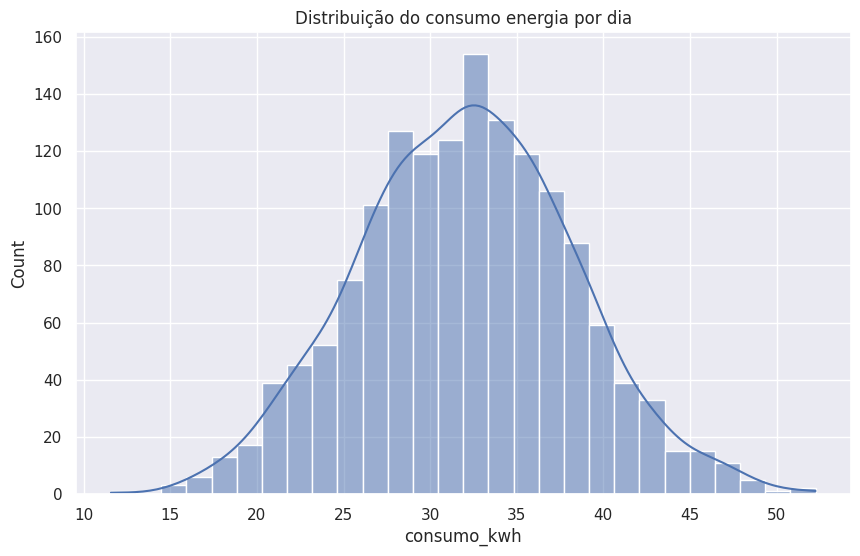

In [14]:
ax = sns.histplot(data=dados, x='consumo_kwh', kde=True)
ax.figure.set_size_inches(10,6)
plt.title('Distribuição do consumo energia por dia')
plt.show()

* Nota-se uma **DISTRIBUIÇÃO SIMÉTRICA**

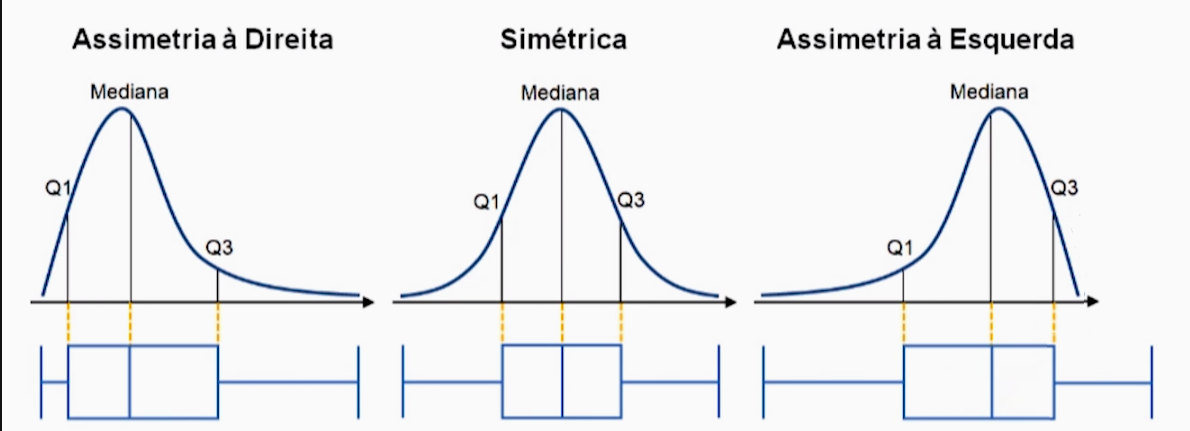

# Dispersão entre as variáveis

In [15]:
dados.columns

Index(['dia_da_semana', 'fim_de_semana', 'feriado', 'temperatura', 'area_m2',
       'numero_moradores', 'consumo_kwh'],
      dtype='object')

* Agora analisando as variáveis em relação ao valor de **Consumo de Energia**

* Todos os dados apresentam um relação crescente com o **Consumo de Energia**

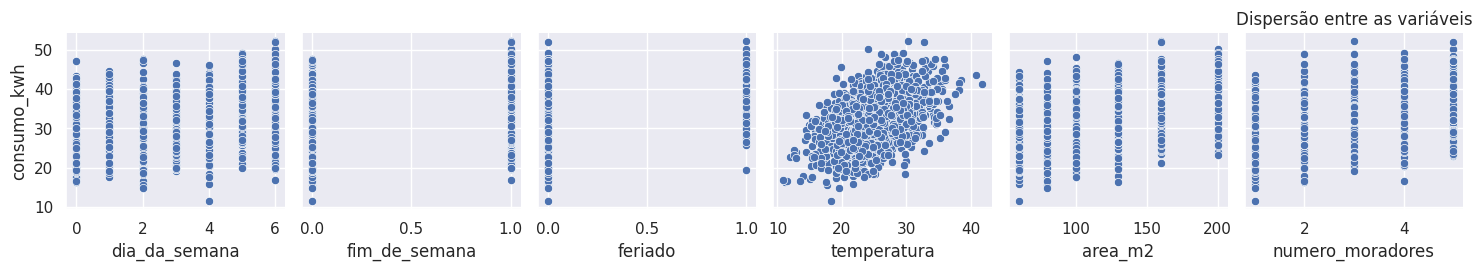

In [16]:
ax = sns.pairplot(dados, y_vars='consumo_kwh', x_vars=['dia_da_semana', 'fim_de_semana', 'feriado', 'temperatura', 'area_m2','numero_moradores'])
plt.title('Dispersão entre as variáveis')
plt.show()

* Agora verificamos a **RETA** da regressão nos gráficos, ficando mais claro a relação positiva de todas as feaures

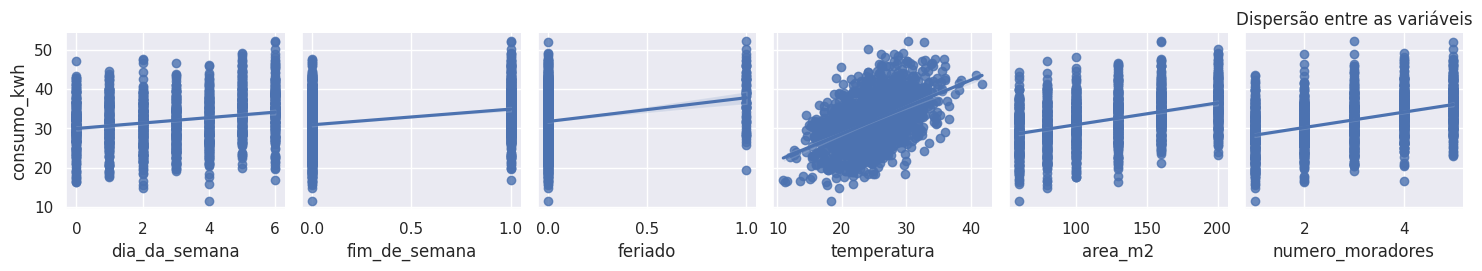

In [17]:
ax = sns.pairplot(dados, y_vars='consumo_kwh', x_vars=['dia_da_semana', 'fim_de_semana', 'feriado', 'temperatura', 'area_m2','numero_moradores'], kind='reg')
plt.title('Dispersão entre as variáveis')
plt.show()

In [18]:
dados.head()

,dia_da_semana,fim_de_semana,feriado,temperatura,area_m2,numero_moradores,consumo_kwh
0,4,0,0,27.9,160,3,35.59
1,5,1,0,18.4,60,4,27.61
2,6,1,0,30.6,200,4,46.54
3,0,0,0,11.2,60,1,16.33
4,1,0,1,22.3,80,5,39.05


# 3. Regressão Linear

* Antes iremos utilizar do **StandardScaler** para deixar todos os dados numéricos dentro de uma mesma escala

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
dados.columns

Index(['dia_da_semana', 'fim_de_semana', 'feriado', 'temperatura', 'area_m2',
       'numero_moradores', 'consumo_kwh'],
      dtype='object')

In [21]:
scaler = StandardScaler()
colunas = ['dia_da_semana', 'fim_de_semana', 'feriado', 'temperatura', 'area_m2','numero_moradores']

dados[colunas] = scaler.fit_transform(dados[colunas])

# Regressão Linear com StatsModels

* Primeiro fazemos a separação do **X** e do **Y**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = dados[colunas]

y = dados['consumo_kwh']

* Fazendo a separação dos dados em **Treino**(70%) e **Teste**(30%)

In [24]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
print(f'X treino : {x_treino.shape}')
print(f'Y treino : {y_treino.shape}')
print(f'X teste : {x_teste.shape}')
print(f'Y teste : {y_teste.shape}')

X treino : (1050, 6)
Y treino : (1050,)
X teste : (450, 6)
Y teste : (450,)


In [26]:
import statsmodels.api as sm

* Adicionando a constante nos dados de treino

In [27]:
x_treino_com_constante = sm.add_constant(x_treino)

In [28]:
x_treino_com_constante.head()

,const,dia_da_semana,fim_de_semana,feriado,temperatura,area_m2,numero_moradores
485,1.0,1.499376,1.580033,-0.231021,-0.705110,0.206930,0.044460
527,1.0,1.499376,1.580033,-0.231021,0.966462,-1.277198,0.753922
199,1.0,-1.501376,-0.632898,-0.231021,0.724524,-1.277198,0.044460
889,1.0,0.499125,-0.632898,-0.231021,-0.375195,-1.277198,-1.374466
844,1.0,-1.001251,-0.632898,-0.231021,-1.452919,-0.429125,1.463385


In [29]:
modelo_statsmodels = sm.OLS(y_treino, x_treino_com_constante).fit()

# Avaliando o Modelo

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            consumo_kwh   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     555.3
Date:                Sat, 06 Dec 2025   Prob (F-statistic):          1.49e-320
Time:                        18:47:37   Log-Likelihood:                -2654.2
No. Observations:                1050   AIC:                             5322.
Df Residuals:                    1043   BIC:                             5357.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.9892      0.094  

* **Observando o teste de significância individual, notamos que a 'dia_da_semana' não ajuda o modelo, portanto teremos que excluir ele**

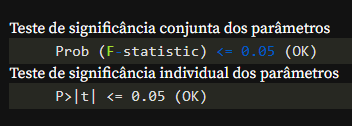

* Fazendo a exclusão da coluna **'Dia_da_semana'**

In [31]:
x = dados[['fim_de_semana', 'feriado', 'temperatura', 'area_m2','numero_moradores']]

y = dados['consumo_kwh']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

# 4. Modelos Machine Learning

# Regressão Linear com Sklearn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [33]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_treino, y_treino)

LinearRegression()

In [34]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_lr.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_lr.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_lr.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_lr.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_lr.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_lr.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.7612556817061772
MAE: 2.402819840675062
RMSE: 1.5501031709776811

Métricas conjunto teste:
R²: 0.7752518282896694
MAE: 2.2973502232326553
RMSE: 1.5157012315204654


# Aplicando a Validação Cruzada - Regressão Linear

In [50]:
from sklearn.model_selection import cross_validate, KFold

In [51]:
cv_regressao = KFold(n_splits=5, shuffle=True, random_state=42)

resultados_regressao = cross_validate(modelo_lr, x, y, scoring='neg_mean_squared_error', cv=cv_regressao, return_train_score=True)

In [52]:
# RMSE -> o valor total do desvio que é errado do valor previsto
# A raiz quadrada transforma de MSE para RMSE , juntamente do valor negativo , pois essa métrica é métrica de minimização
treino_rmse = np.sqrt(-resultados_regressao['train_score'])
teste_rmse = np.sqrt(-resultados_regressao['test_score'])


print("Treino RMSE em cada fold:", treino_rmse)
print("Teste RMSE em cada fold:", teste_rmse)
print("\nMédia do RMSE no treino:", treino_rmse.mean())
print("Média do RMSE no teste:", teste_rmse.mean())

Treino RMSE em cada fold: [2.99288113 3.0055214  3.02086266 2.95685333 3.01235379]
Teste RMSE em cada fold: [3.03237223 2.97830376 2.93461768 3.16580814 2.94875742]

Média do RMSE no treino: 2.997694463315943
Média do RMSE no teste: 3.0119718472098014


# Árvore de Decisão

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
modelo_dt = DecisionTreeRegressor(max_depth=10)
modelo_dt.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=10)

In [37]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_dt.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_dt.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_dt.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_dt.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_dt.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_dt.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.9118288416700879
MAE: 1.1951798948549281
RMSE: 1.0932428343487681

Métricas conjunto teste:
R²: 0.5968482330997787
MAE: 3.1315257194519734
RMSE: 1.7696117425729219


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
modelo_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)
modelo_rf.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=300, random_state=42)

In [40]:
print('Métricas conjunto treino:')
print(f'R²: {metrics.r2_score(y_treino, modelo_rf.predict(x_treino))}')
print(f'MAE: {metrics.mean_absolute_error(y_treino, modelo_rf.predict(x_treino))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_treino, modelo_rf.predict(x_treino)))}')

print('\nMétricas conjunto teste:')
print(f'R²: {metrics.r2_score(y_teste, modelo_rf.predict(x_teste))}')
print(f'MAE: {metrics.mean_absolute_error(y_teste, modelo_rf.predict(x_teste))}')
print(f'RMSE: {np.sqrt(metrics.mean_absolute_error(y_teste, modelo_rf.predict(x_teste)))}')

Métricas conjunto treino:
R²: 0.7747043290665494
MAE: 2.30636412684305
RMSE: 1.5186718298707758

Métricas conjunto teste:
R²: 0.6954871250431873
MAE: 2.6500372849476443
RMSE: 1.627893511550324


# 5. Resultados

**Mostrando agora os gráficos:**

* Real X Previstos

* Gráfico dos resíduos

# Gráfico: Real X Previsto

In [42]:
y_previsto_lr = modelo_lr.predict(x_teste)

**Análise do Real X Previsto**

* O gráfico compara os valores reais com os valores previstos pelo modelo de regressão linear.

* Observa-se que os pontos se distribuem ao longo de uma tendência crescente, indicando forte relação linear entre as variáveis.

* A concentração dos pontos próxima da linha ideal de previsão mostra que o modelo captura bem a tendência dos dados.

* A dispersão em torno dessa linha representa a variabilidade natural e os erros de previsão, mas sem indicar um viés sistemático claro.

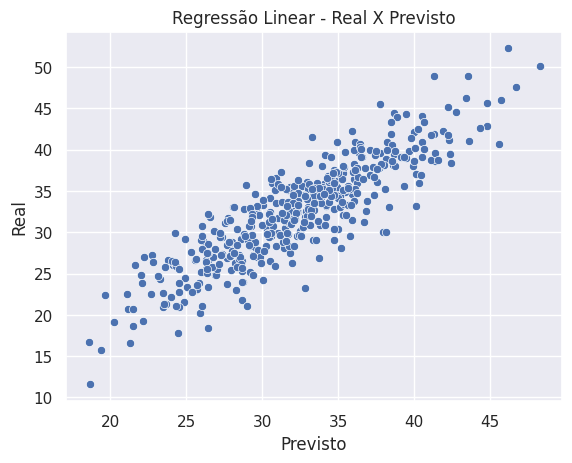

In [43]:
ax = sns.scatterplot(x = y_previsto_lr, y= y_teste)
plt.title('Regressão Linear - Real X Previsto')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Gráfico dos Resíduos

In [44]:
residuo = y_teste - y_previsto_lr

**Análise dos Resíduos da Regressão Linear**

* O histograma dos resíduos apresenta uma distribuição aproximadamente simétrica em torno do zero, indicando ausência de viés sistemático nas previsões.

* A maior concentração dos resíduos próxima de zero mostra que, na maioria dos casos, os erros do modelo são pequenos e controlados.

* A forma da distribuição se assemelha a uma curva aproximadamente normal, o que é um bom sinal para modelos de regressão linear.

* Alguns valores mais extremos indicam a presença de outliers, mas sem evidência de comprometimento severo do modelo.

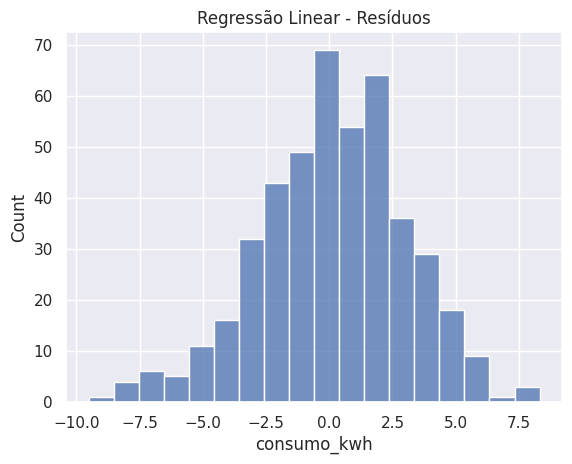

In [45]:
ax = sns.histplot(residuo)
plt.title('Regressão Linear - Resíduos')
plt.show()

# Métricas Regressão Linear

**Avaliação das Métricas da Regressão Linear**

* O valor de R² próximo de 0,77 tanto no treino quanto no teste indica que o modelo explica cerca de 77% da variabilidade dos dados, o que representa um bom nível de ajuste.

* A proximidade entre os valores de R² do treino e do teste sugere que o modelo generaliza bem e não apresenta sinais de overfitting.

* O MAE (Erro Médio Absoluto) em torno de 2,2 indica que, em média, o modelo erra cerca de 2 unidades em suas previsões.

* O RMSE, ligeiramente maior que o MAE, mostra que existem alguns erros mais altos, porém sem impacto expressivo no desempenho geral do modelo.

**Conclusão geral:**

* Os resultados mostram que o modelo de regressão linear apresenta desempenho consistente e estável, com boa capacidade preditiva e comportamento semelhante entre os dados de treino e teste, indicando que é um modelo confiável para o problema analisado.